In [1]:
#Opened with --pylab flag
#Need to create code to analyze piot data
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
#filepath = '/Users/frankanayet/Dropbox/NLineExperiment/Data'
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [3]:
print 'Pandas version ' + pd.__version__

Pandas version 0.16.2


In [4]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [5]:
sub_ex = data_dict.keys()[0]

In [6]:
#data_dict['s_00011']['p']

In [7]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [8]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [9]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [10]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [11]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'run'+str(run+1)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [12]:
new_dat[sub_ex]['NlineResults']['run1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'TestX',
 u'ITI_onset_real',
 u'consider_onset_real',
 u'ITI_onset',
 u'RT',
 u'hold',
 u'decision_end',
 u'decision_onset_real',
 u'RTHold',
 u'decision_end_real',
 u'Correct',
 u'Wrong',
 u'BadPress',
 u'consider_onset',
 u'Response',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'mouse_pos',
 u'Block',
 u'catch_probe',
 u'Probe',
 u'hold_onset',
 u'Move',
 u'decision_onset',
 u'hold_onset_real',
 u'Click']

In [13]:
new_dat[sub_ex]['NlineResults']['run1']['Probe']

[array([57], dtype=uint8),
 array([77], dtype=uint8),
 array([3], dtype=uint8),
 array([21], dtype=uint8),
 array([60], dtype=uint8),
 array([28], dtype=uint8),
 array([85], dtype=uint8),
 array([74], dtype=uint8),
 array([33], dtype=uint8),
 array([7], dtype=uint8),
 array([90], dtype=uint8),
 array([36], dtype=uint8),
 array([11], dtype=uint8),
 array([45], dtype=uint8),
 array([98], dtype=uint8),
 array([65], dtype=uint8),
 array([70], dtype=uint8),
 array([14], dtype=uint8),
 array([80], dtype=uint8),
 array([20], dtype=uint8),
 array([-58], dtype=int16),
 array([-94], dtype=int16),
 array([-86], dtype=int16),
 array([54], dtype=uint8),
 array([-44], dtype=int16),
 array([-78], dtype=int16),
 array([-10], dtype=int16),
 array([48], dtype=uint8),
 array([30], dtype=uint8),
 array([-28], dtype=int16),
 array([96], dtype=uint8),
 array([-34], dtype=int16),
 u'of',
 u'is',
 u'be',
 u'me',
 u'it',
 u'as',
 u'my',
 u'so',
 u'we',
 u'or',
 u'ox',
 u'by',
 u'am',
 u'he',
 u'do',
 u'if']

In [14]:
new_dat[sub_ex]['NlineResults']['run1']['catch_probe']

[array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), 

In [15]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['run1'].keys())

In [16]:
indexes[90]

('s_02009', 'run3', 42)

In [17]:
indexes[1][1]

'run1'

In [18]:
varnames = new_dat[sub_ex][Nline]['run1'].keys()
varnames[24]

u'Block'

In [19]:
len(indexes)

4224

In [20]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [21]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['run1'].iloc[0:48]['catch'])

12

In [22]:
nline_df.loc[sub_ex].loc['run1'].iloc[0:10]['Error']

Trial
0   -0.023744
1   -0.025507
2    0.000000
3    0.000000
4   -0.027313
5    0.001938
6   -0.046035
7    0.000000
8    0.070881
9    0.026916
Name: Error, dtype: float64

In [23]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [24]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test[i] = np.ravel(test[i])
    test[i] = test[i][0]
nline_df['Probe'] = test
nline_df['Probe']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Subject  Run   Trial
s_02009  run1  0         57
               1         77
               2          3
               3         21
               4         60
               5         28
               6         85
               7         74
               8         33
               9          7
               10        90
               11        36
               12        11
               13        45
               14        98
               15        65
               16        70
               17        14
               18        80
               19        20
               20       -58
               21       -94
               22       -86
               23        54
               24       -44
               25       -78
               26       -10
               27        48
               28        30
               29       -28
                       ... 
s_02022  run4  18        or
               19        my
               20        of
               21        we

### Create Stim Labels

In [25]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [26]:
nline_df.columns

Index([           u'BadPress',               u'Block',               u'Click',
                   u'Correct',               u'Error',           u'ITI_onset',
            u'ITI_onset_real',            u'Line_pct',                u'Move',
                    u'Points',               u'Probe',                  u'RT',
                    u'RTHold',            u'Response',                u'Slow',
                      u'Task',               u'TestX',               u'Trial',
                     u'Wrong',               u'catch',         u'catch_probe',
            u'consider_onset', u'consider_onset_real',        u'decision_end',
         u'decision_end_real',      u'decision_onset', u'decision_onset_real',
                      u'hold',          u'hold_onset',     u'hold_onset_real',
                       u'iti',           u'mouse_pos'],
      dtype='object')

In [27]:
#Make task as string
nline_df['Task'] = nline_df['Task'].astype(str)
nline_df['Task'][nline_df['Task']=='1'] = 'Pos'
nline_df['Task'][nline_df['Task']=='2'] = 'Neg'
nline_df['Task'][nline_df['Task']=='3'] = 'Word'
nline_df['Task'].iloc[16]

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'Neg'

In [28]:
nline_df['Task']

Subject  Run   Trial
s_02009  run1  0         Pos
               1         Pos
               2         Pos
               3         Pos
               4         Pos
               5         Pos
               6         Pos
               7         Pos
               8         Pos
               9         Pos
               10        Pos
               11        Pos
               12        Pos
               13        Pos
               14        Pos
               15        Pos
               16        Neg
               17        Neg
               18        Neg
               19        Neg
               20        Neg
               21        Neg
               22        Neg
               23        Neg
               24        Neg
               25        Neg
               26        Neg
               27        Neg
               28        Neg
               29        Neg
                        ... 
s_02022  run4  18       Word
               19       Word
               20     

In [29]:
nline_df['Dist0'] = abs(nline_df['Line_pct'] - 0)
nline_df['Dist100'] = abs(nline_df['Line_pct'] - 1)
nline_df['Dist50'] = abs(nline_df['Line_pct'] - 0.5)
nline_df['LandmarkDist'] = nline_df[['Dist0','Dist100','Dist50']].min(axis=1) 
nline_df['LandmarkDist']

Subject  Run   Trial
s_02009  run1  0        0.07
               1        0.23
               2        0.03
               3        0.21
               4        0.10
               5        0.22
               6        0.15
               7        0.24
               8        0.17
               9        0.07
               10       0.10
               11       0.14
               12       0.11
               13       0.05
               14       0.02
               15       0.15
               16       0.15
               17       0.07
               18       0.10
               19       0.10
               20       0.21
               21       0.03
               22       0.07
               23       0.23
               24       0.22
               25       0.11
               26       0.05
               27       0.24
               28       0.15
               29       0.14
                        ... 
s_02022  run4  18       0.15
               19       0.03
               20     

# Create Onset Files

In [30]:
nline_df['Missed'] = 0

In [31]:
nline_df['Missed'][(nline_df.catch < 1) & (nline_df.Error == 1)] = 1
nline_df[(nline_df.Missed == 1)]['Error']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Subject  Run   Trial
s_02009  run1  22       1
s_02003  run1  0        1
               15       1
               26       1
               36       1
         run3  20       1
               23       1
         run4  1        1
s_02002  run1  9        1
               29       1
s_02001  run1  25       1
s_02007  run4  24       1
s_02006  run1  12       1
         run2  35       1
s_02005  run1  0        1
               7        1
               20       1
               32       1
               34       1
               36       1
               43       1
         run3  13       1
               22       1
               47       1
         run2  15       1
               20       1
               21       1
               29       1
         run4  6        1
               9        1
                       ..
s_02020  run1  43       1
         run3  46       1
         run2  35       1
               46       1
         run4  12       1
               24       1
               43

In [32]:
nline_df['Missed'][(nline_df.catch < 1) & (abs(nline_df.Error) >= 0.1)] = 1
nline_df[(nline_df.Missed == 1)]['Error']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Subject  Run   Trial
s_02009  run1  22       1.000000
               24       0.220000
s_02003  run1  0        1.000000
               15       1.000000
               26       1.000000
               36       1.000000
         run3  20       1.000000
               23       1.000000
         run4  1        1.000000
               47      -0.137533
s_02002  run1  9        1.000000
               29       1.000000
         run2  34      -0.687004
               43       0.575374
s_02001  run1  25       1.000000
         run2  23       0.205330
s_02007  run1  18       0.107709
         run2  5       -0.210529
         run4  9       -0.962379
               24       1.000000
s_02006  run1  12       1.000000
               32      -0.142687
         run3  38       0.208590
               39       0.402335
         run2  35       1.000000
s_02005  run1  0        1.000000
               7        1.000000
               20       1.000000
               27      -0.275551
               32     

In [117]:
import string
#vals = ['q1','q2','q3','q4']
#val_dict = {'q1':[0,0.25],'q2':[0.25,0.5],'q3':[0.5,0.75],'q4':[0.75,1]}
#tasks = nline_df.groupby('Task')
#labels = tasks.indices.keys()
#tasks = nline_df.groupby('Task')
#labels = tasks.indices.keys()
phase = ['cons', 'dec']
#dec_ctch_onset = {}
big_dict = {}
# Breaks always happen at the same time in the sequence
break_onset = [[190, 6, 1],[388, 6, 1]]
for s in nline_df.index.levels[0]:
    print s
    big_dict[s] = {}
    #dec_ctch_onset[s] = {}
    for r in nline_df.index.levels[1]:
        #print r
        big_dict[s][r] = {}
        ctch = nline_df.loc[s].loc[r]['catch']
        if len(nline_df.loc[s].loc[r]['hold']) == 0:
            hold = 2.5
        else:
            hold = min(nline_df.loc[s].loc[r]['hold'])
        dec_ctch_tmp = nline_df.loc[s].loc[r]['decision_onset_real'] - 16
        dec_ctch_tmp = dec_ctch_tmp[ctch==1]
        big_dict[s][r]['dec_ctch_onset'] = pd.DataFrame.from_items([('time',dec_ctch_tmp[dec_ctch_tmp>=0]),('duration',dec_time),('val',1)])
        cons_duration = hold + cons_time
        for ph in phase:
            if ph == 'dec':
                tmp_int = nline_df.loc[s].loc[r]['decision_onset_real'] - 16
                tmp_int = tmp_int[ctch==0]
                big_dict[s][r][ph] = pd.DataFrame.from_items([('time',tmp_int[tmp_int>=0]),('duration',dec_time),('val',1)])
            elif ph == 'cons':
                big_dict[s][r][ph] = {}
                big_dict[s][r][ph] = {}
                tmp_int = nline_df.loc[s].loc[r]['consider_onset_real'] - 16
                tmp_val = nline_df.loc[s].loc[r]['Line_pct']
                tmp_task = nline_df.loc[s].loc[r]['Task']
                big_dict[s][r][ph] = pd.DataFrame.from_items([('time',tmp_int[tmp_int>=0]),('duration',cons_duration),('val',tmp_val),('task',tmp_task)])
        big_dict[s][r]['onsets'] = pd.concat([big_dict[s][r]['cons'], big_dict[s][r]['dec']],join='outer',)
        big_dict[s][r]['onsets'] = big_dict[s][r]['onsets'].sort('time')
                    

s_02001
s_02002
s_02003
s_02004
s_02005
s_02006
s_02007
s_02009
s_02010
s_02011
s_02012
s_02014
s_02015
s_02016
s_02017
s_02018
s_02019
s_02020
s_02021
s_02022
s_02023
s_02024
s_02027


In [118]:
big_dict['s_02009']['run1']['cons']

,time,duration,val,task
Trial,,,,
0,1.504506,3,0.57,Pos
1,12.003057,3,0.77,Pos
2,22.003109,3,0.03,Pos
3,33.003152,3,0.21,Pos
4,45.003169,3,0.60,Pos
5,62.003166,3,0.28,Pos
6,74.001437,3,0.85,Pos
7,84.502607,3,0.74,Pos
8,97.501918,3,0.33,Pos


In [119]:
values = nline_df.Line_pct.unique()
values.sort()
values

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

In [120]:
tasks = nline_df.Task.unique()
tasks

array(['Pos', 'Neg', 'Word'], dtype=object)

In [121]:
big_dict['s_02009']['run1']['cons'][big_dict['s_02009']['run1']['cons']['val']==0.03].index.tolist()

[2, 21, 44]

In [122]:
x = big_dict['s_02009']['run3']['cons'][big_dict['s_02009']['run3']['cons']['val']==0.03]
x

,time,duration,val,task
Trial,,,,
10,121.003877,3,0.03,Word
18,226.001578,3,0.03,Pos
46,566.502752,3,0.03,Neg


In [123]:
big_dict.keys()

['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [124]:
del big_dict['s_02001']
del big_dict['s_02002']
del big_dict['s_02020']
del big_dict['s_02019']
big_dict.keys()

['s_02009',
 's_02003',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02023',
 's_02022']

In [5]:
big_index_dict = {}
for s in big_dict.keys():
    print s
    big_index_dict[s] = {}
    #dec_ctch_onset[s] = {}
    for task in tasks:
        big_index_dict[s][task] = {}
        for value in values:
            print value
            big_index_dict[s][task][str(value)] = []
            for r in big_dict[s].keys():
                print r
                tmp = big_dict[s][r]['cons'][big_dict[s][r]['cons']['task']==task]
                #print tmp
                tmp_trial = tmp[tmp['val']==value].index.tolist()
                print tmp_trial
                big_index_dict[s][str(value)].append(tmp_trial)

NameError: name 'big_dict' is not defined

In [126]:
big_index_dict['s_02009']

{'Neg': {'0.03': [21, 46, 16, 7],
  '0.07': [22, 47, 20, 5],
  '0.11': [25, 38, 31, 12],
  '0.21': [20, 33, 27, 8],
  '0.28': [24, 39, 19, 0],
  '0.33': [31, 32, 18, 10],
  '0.36': [29, 44, 25, 14],
  '0.45': [26, 36, 23, 2],
  '0.57': [17, 43, 17, 3],
  '0.6': [19, 37, 26, 13],
  '0.65': [28, 34, 21, 9],
  '0.74': [27, 35, 22, 4],
  '0.77': [23, 42, 29, 6],
  '0.85': [16, 40, 24, 11],
  '0.9': [18, 45, 28, 1],
  '0.98': [30, 41, 30, 15]},
 'Pos': {'0.03': [2, 18, 34, 38],
  '0.07': [9, 25, 39, 36],
  '0.11': [12, 22, 45, 47],
  '0.21': [3, 21, 41, 40],
  '0.28': [5, 24, 37, 39],
  '0.33': [8, 29, 32, 33],
  '0.36': [11, 17, 42, 44],
  '0.45': [13, 30, 36, 41],
  '0.57': [0, 28, 35, 46],
  '0.6': [4, 27, 47, 45],
  '0.65': [15, 16, 33, 42],
  '0.74': [7, 23, 44, 32],
  '0.77': [1, 19, 40, 35],
  '0.85': [6, 20, 46, 43],
  '0.9': [10, 26, 38, 34],
  '0.98': [14, 31, 43, 37]},
 'Word': {'0.03': [44, 10, 5, 19],
  '0.07': [40, 5, 4, 17],
  '0.11': [34, 6, 6, 16],
  '0.21': [46, 3, 1, 27],

In [127]:
from nilearn import image
import nibabel

In [128]:
neuro_filepath = '/fMRI/NLine/'
os.chdir(neuro_filepath)

In [129]:
pwd

u'/fMRI/NLine'

In [130]:
dat_files = glob.glob('s_020??/run?_AllOnsets.feat/betaseries/ev1*.nii.gz')
dat_files

['s_02003/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02003/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02003/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02003/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02004/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02004/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02004/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02004/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02005/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02005/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02005/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02005/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02006/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02006/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02006/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02006/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02007/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz',
 's_02007/run2

In [131]:
dict_files = {}
for i in dat_files:
    id1 = 0
    id2 = dat_files[0].find('/')
    id3 = id2+1
    sub_nbr = i[id1:id2]
    run_nbr = i[id3:id3+4]
    dict_files[sub_nbr] = {}

In [132]:
for i in dat_files:
    id1 = 0
    id2 = dat_files[0].find('/')
    id3 = id2+1
    sub_nbr = i[id1:id2]
    run_nbr = i[id3:id3+4]
    dict_files[sub_nbr][run_nbr] = [i]

In [133]:
dict_files

{'s_02003': {'run1': ['s_02003/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run2': ['s_02003/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run3': ['s_02003/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run4': ['s_02003/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz']},
 's_02004': {'run1': ['s_02004/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run2': ['s_02004/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run3': ['s_02004/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run4': ['s_02004/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz']},
 's_02005': {'run1': ['s_02005/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run2': ['s_02005/run2_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run3': ['s_02005/run3_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run4': ['s_02005/run4_AllOnsets.feat/betaseries/ev1_LSS.nii.gz']},
 's_02006': {'run1': ['s_02006/run1_AllOnsets.feat/betaseries/ev1_LSS.nii.gz'],
  'run2': ['s_02006/run2_AllOnsets.feat/betaseries/ev1_L

In [134]:
values = [str(x) for x in values]
values

['0.03',
 '0.07',
 '0.11',
 '0.21',
 '0.28',
 '0.33',
 '0.36',
 '0.45',
 '0.57',
 '0.6',
 '0.65',
 '0.74',
 '0.77',
 '0.85',
 '0.9',
 '0.98']

In [136]:
runs = ['run1','run2','run3','run4']
for s in big_index_dict.keys():
    for task in big_index_dict[s].keys():
        for r in range(0,len(runs)):
            print r
            tmp_list = []
            for number in values:
                print number
                tmp_list.append(big_index_dict[s][task][number][r])
            big_index_dict[s][task][runs[r]] = tmp_list

0
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
1
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
2
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
3
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
0
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
1
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
2
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
3
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
0
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
1
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
2
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
3
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.45
0.57
0.6
0.65
0.74
0.77
0.85
0.9
0.98
0
0.03
0.07
0.11
0.21
0.28
0.33
0.36
0.4

In [137]:
big_index_dict['s_02003']

{'Neg': {'0.03': [2, 13, 32, 22],
  '0.07': [3, 14, 38, 24],
  '0.11': [7, 10, 43, 28],
  '0.21': [1, 6, 47, 25],
  '0.28': [12, 1, 37, 31],
  '0.33': [4, 15, 39, 18],
  '0.36': [10, 3, 34, 26],
  '0.45': [8, 5, 46, 21],
  '0.57': [5, 7, 41, 19],
  '0.6': [14, 11, 40, 17],
  '0.65': [13, 4, 33, 23],
  '0.74': [0, 8, 35, 29],
  '0.77': [11, 0, 44, 30],
  '0.85': [6, 9, 36, 16],
  '0.9': [9, 2, 42, 20],
  '0.98': [15, 12, 45, 27],
  'run1': [2, 3, 7, 1, 12, 4, 10, 8, 5, 14, 13, 0, 11, 6, 9, 15],
  'run2': [13, 14, 10, 6, 1, 15, 3, 5, 7, 11, 4, 8, 0, 9, 2, 12],
  'run3': [32, 38, 43, 47, 37, 39, 34, 46, 41, 40, 33, 35, 44, 36, 42, 45],
  'run4': [22, 24, 28, 25, 31, 18, 26, 21, 19, 17, 23, 29, 30, 16, 20, 27]},
 'Pos': {'0.03': [22, 42, 29, 36],
  '0.07': [26, 32, 28, 41],
  '0.11': [19, 40, 26, 34],
  '0.21': [24, 44, 21, 35],
  '0.28': [18, 41, 25, 40],
  '0.33': [17, 47, 24, 37],
  '0.36': [16, 39, 27, 47],
  '0.45': [28, 33, 18, 39],
  '0.57': [29, 46, 30, 38],
  '0.6': [30, 38, 31, 3

In [75]:
example_img = image.index_img(dict_files['s_02003']['run1'][0], 1)
example_img2 = image.index_img(dict_files['s_02003']['run1'][0], 2)

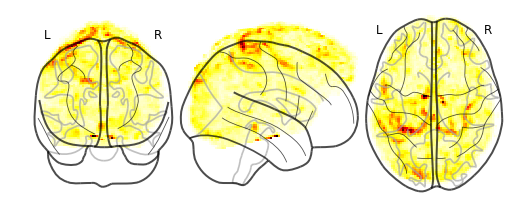

In [76]:
from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline 
plotting.plot_glass_brain(example_img)

In [77]:
example_img.shape

(110, 110, 62)

In [138]:
def sort_run(s,task,r):
    tmp_img = nibabel.load(dict_files[s][r][0])
    tmp_data = tmp_img.get_data()
    myorder = big_index_dict[s][task][r]
    img_shape = tmp_img.shape
    print 'img_shape', img_shape
    cor_img_shape = [img_shape[0],img_shape[1],img_shape[2],len(myorder)]
    print 'cor_img_shape', cor_img_shape
    zero_img = np.zeros(cor_img_shape)
    for x in range(0,len(myorder)):
        zero_img[:,:,:,x] = tmp_data[:,:,:,myorder[x]]
    nii = nibabel.Nifti1Image(zero_img,header=tmp_img.get_header(),affine=tmp_img.get_affine())
    out_path = s+'/'+r+'_AllOnsets.feat/betaseries/'
    out_name = s+'_'+r+'_'+task+'_sorted.nii.gz'
    out_pathname = out_path + out_name
    nibabel.save(nii,out_pathname)

In [87]:
sort_run('s_02003','Neg','run1')

In [139]:
runs = ['run1','run2','run3','run4']
for s in big_index_dict.keys():
    print s
    for task in big_index_dict[s].keys():
        for r in range(0,len(runs)):
            print runs[r]
            sort_run(s,task,runs[r])

s_02018
run1
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run2
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run3
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run4
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run1
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run2
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run3
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run4
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run1
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run2
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run3
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run4
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
s_02009
run1
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run2
img_shape (110, 110, 62, 48)
cor_img_shape [110, 110, 62, 16]
run3
img_shape (110, 110, 62, 48)
cor_img_shap

## Save Files